In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Add in the Yu sample to the prior in a sensible way

We want to expand our prior to include the Yu sample.  This is easy enough to do but is just a case of getting all out ducks in a row.

Let's start by looking at what we have so far ...

In [24]:
current_filename = 'prior_data.csv'
df_current = pd.read_csv(current_filename)
df_current.head()

,Unnamed: 0,dnu,numax,eps,d02,alpha,env_height,env_width,mode_width,teff,bp_rp
0,0,0.797313,1.849061,1.042422,-0.083138,-2.013106,1.117461,0.949266,-0.951869,3.692062,1.319325
1,0,0.613473,1.621688,0.932101,-0.293549,-1.886150,0.891196,0.796977,-1.005161,3.677316,1.413556
2,0,0.559830,1.422844,0.831581,-0.242940,-1.465383,0.308770,0.689412,-0.851908,3.691585,1.330576
3,0,0.871902,1.971060,1.024286,-0.083248,-2.069506,0.749085,1.140958,-0.620151,3.703231,1.167095
4,0,0.574075,1.472324,0.759243,-0.220728,-2.064063,0.755530,0.589592,-1.139218,3.679067,1.404783


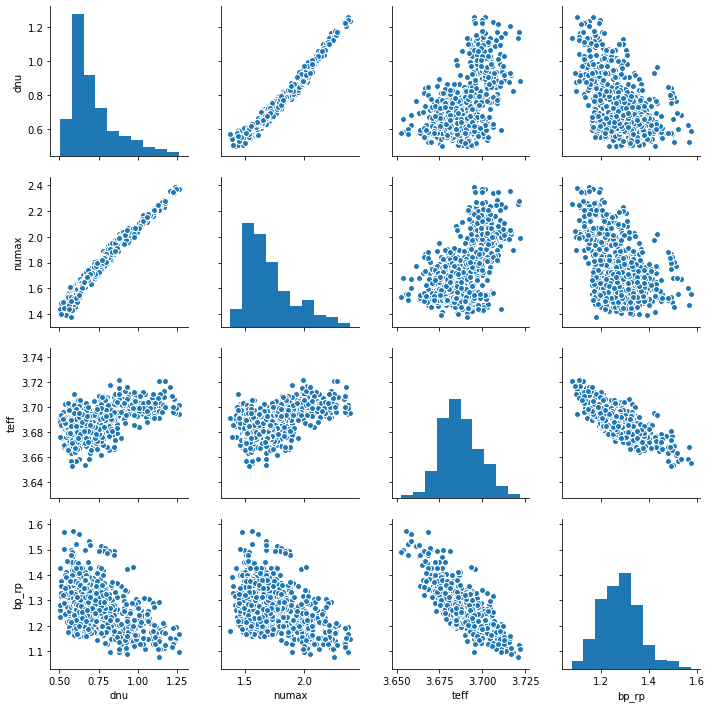

In [25]:
sns.pairplot(df_current[['dnu', 'numax', 'teff', 'bp_rp']])

## The Yu sample

The Yu sample is ~16K stars.  We want to add all of them in but it probably makes sense to add them in in batches.  If we start with a set of ~ 1000 stars from the Yu sample that look like they have properties similar to the prior and then repeat, slowly expandnig the reach of the prior untill all the Yu stars are processed.

The current prior sample is probably similar to the Yu sample except in that it will have a lack of low numax stars and a lack of metal poor stars (and potentially a lack of metal rich stars).  So we should pa paticular attention to numax and [Fe/H].

Except - we don't use [Fe/H], instead we use a combination of of Teff and BP-RP.  So we should search for 1000 new stars that are similar to the current prior in numax/teff/bp_rp.

In [33]:
yu = pd.read_csv('yu_sample.csv')
yu['lg_numax'] = np.log10(yu.numax)
yu['lg_teff'] = np.log10(yu.teff)
yu.head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff
0,757137,4751,139,29.99,0.60,3.399,0.011,1.318515,0.05,1.476976,3.676785
1,892010,4834,151,17.85,0.89,2.427,0.078,1.423412,0.05,1.251638,3.684307
2,892738,4534,135,7.48,0.35,1.300,0.031,1.549872,0.05,0.873902,3.656482
3,892760,5188,183,29.48,0.48,3.962,0.116,1.298814,0.05,1.469527,3.715000
4,893214,4728,80,41.39,0.54,4.311,0.013,1.348477,0.05,1.616895,3.674677


## How to find 1000 similar stars from the Yu sample

Well - we could just use the KDE and rank the stars by the value return by a KDE in [numax, teff, bp_rp].

Let's see ...

In [34]:
cols = ['numax', 'teff', 'bp_rp']
yu_cols = ['lg_numax', 'lg_teff', 'bp_rp']
import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate(data=df_current[cols].values, 
                                      var_type='ccc', 
                                      bw='cv_ml')

In [35]:
rank = []
for index, row in yu.iterrows():
    rank.append(np.log(kde.pdf(row[yu_cols].values)))

/home/davies/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
yu['rank'] = rank

In [37]:
yu.head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank
0,757137,4751,139,29.99,0.60,3.399,0.011,1.318515,0.05,1.476976,3.676785,5.863583
1,892010,4834,151,17.85,0.89,2.427,0.078,1.423412,0.05,1.251638,3.684307,-9.548468
2,892738,4534,135,7.48,0.35,1.300,0.031,1.549872,0.05,0.873902,3.656482,-146.160513
3,892760,5188,183,29.48,0.48,3.962,0.116,1.298814,0.05,1.469527,3.715000,-6.949888
4,893214,4728,80,41.39,0.54,4.311,0.013,1.348477,0.05,1.616895,3.674677,6.448159


In [38]:
yu.sort_values('rank', ascending=False).head()

,ID,teff,teff_err,numax,numax_err,dnu,dnu_err,bp_rp,bp_rp_err,lg_numax,lg_teff,rank
4394,5629459,4837,100,41.28,0.58,4.491,0.033,1.282663,0.05,1.615740,3.684576,6.883443
10922,9456598,4841,100,40.63,0.70,4.487,0.018,1.286463,0.05,1.608847,3.684935,6.876636
14354,11250139,4834,100,40.40,0.49,4.611,0.009,1.278662,0.05,1.606381,3.684307,6.874328
11696,9834365,4830,80,39.99,0.76,4.479,0.023,1.279106,0.05,1.601951,3.683947,6.872019
1699,3946593,4831,80,39.40,0.75,4.516,0.021,1.281460,0.05,1.595496,3.684037,6.871032


In [40]:
yu.sort_values('rank', ascending=False)[:1000].to_csv('stage1.csv')

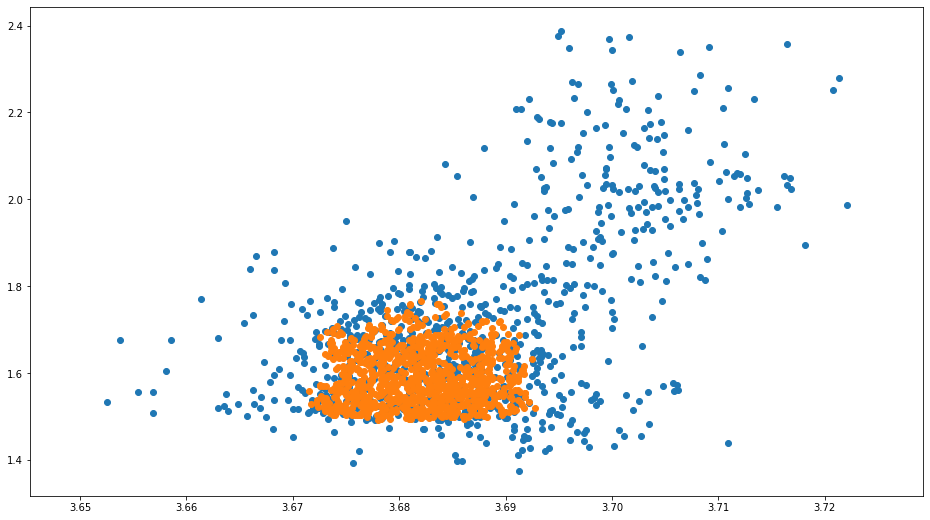

In [45]:
new = yu.sort_values('rank', ascending=False)[:1000]
old = yu.sort_values('rank', ascending=False)[1000:]
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_current.teff, df_current.numax)
ax.scatter(new.lg_teff, new.lg_numax)